## Linear Regression: Homoscedasticity 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_goldfeldquandt
from scipy.stats import bartlett
from statsmodels.stats.diagnostic import het_white
from scipy.stats import boxcox


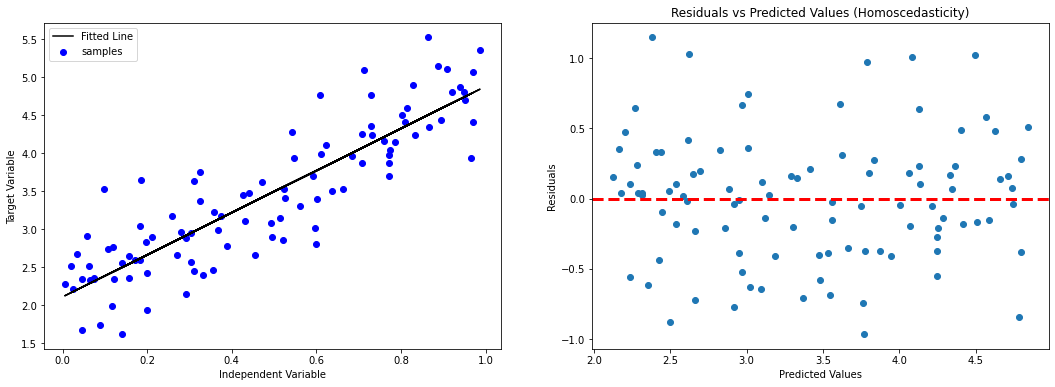

In [2]:
np.random.seed(42)
X = np.random.rand(100)
y = 3*X + 2 + 0.5*np.random.randn(100)
coefficients = np.polyfit(X, y, 1)
polynomial = np.poly1d(coefficients)

fig, [ax0, ax1] = plt.subplots(1,2, figsize=(18,6))
ax0.scatter(X, y, color='blue', label="samples")
y_pred = polynomial(X)
ax0.plot(X, y_pred, color='black', label='Fitted Line')
ax0.set_xlabel("Independent Variable")
ax0.set_ylabel("Target Variable")
ax0.legend()

# Predicted values
y_pred = polynomial(X)

# Residuals
residuals = y - y_pred

# Scatter plot of residuals against predicted values
ax1.scatter(y_pred, residuals)
ax1.axhline(y=0, color='r', linestyle='--', linewidth=3)  # Center line at 0
ax1.set_title('Residuals vs Predicted Values (Homoscedasticity)')
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Residuals')
plt.show()


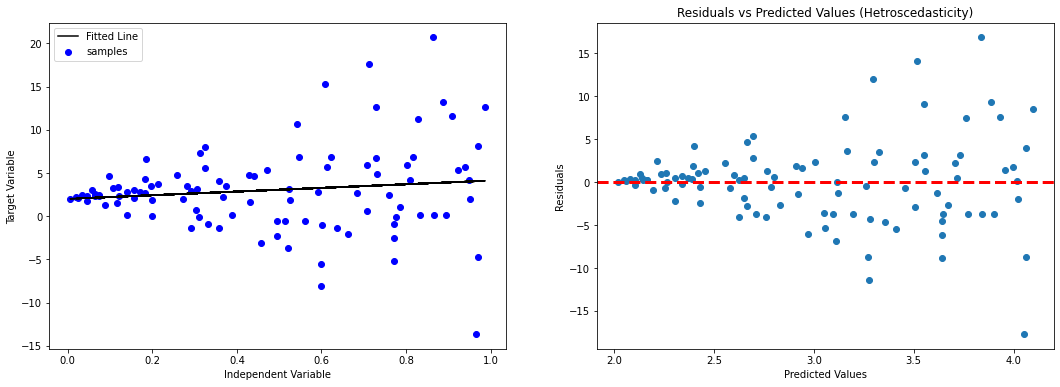

In [3]:
np.random.seed(42)
X = np.random.rand(100)
y = 3*X + 2 + 10*X*np.random.randn(100)

coefficients = np.polyfit(X, y, 1)
polynomial = np.poly1d(coefficients)

fig, [ax0, ax1] = plt.subplots(1,2, figsize=(18,6))
ax0.scatter(X, y, color='blue', label="samples")
y_pred = polynomial(X)
ax0.plot(X, y_pred, color='black', label='Fitted Line')
ax0.set_xlabel("Independent Variable")
ax0.set_ylabel("Target Variable")
ax0.legend()

# Residuals
residuals = y - y_pred

# Scatter plot of residuals against predicted values
ax1.scatter(y_pred, residuals)
ax1.axhline(y=0, color='r', linestyle='--', linewidth=3)  # Center line at 0
ax1.set_title('Residuals vs Predicted Values (Hetroscedasticity)')
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Residuals')
plt.show()


## Manually Doing Goldfeld-Quandt test

In [4]:
data =pd.DataFrame({'X': X, 'y': y}).reset_index(drop=True)
data = data.sort_values(by='X').reset_index(drop=True)
data.head()

,X,y
0,0.005522,2.045389
1,0.020584,2.250184
2,0.025419,2.146590
3,0.034389,2.496165
4,0.045227,1.719851


In [5]:
groupI = data[data['X']<=0.2]
groupII = data[data['X']>0.2]
print(len(groupI), ',',len(groupII))

28 , 72


## Group I, RSS1

In [6]:
XI = groupI['X'].to_numpy().reshape(-1,1)
yI = groupI['y'].to_numpy()
model = LinearRegression()
model.fit(XI, yI)
y_predI = model.predict(XI)

In [7]:
groupI['y_pred'] = y_predI

<ipython-input-7-ab6882323eb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupI['y_pred'] = y_predI


In [8]:
groupI['residual'] = groupI['y_pred'] - groupI['y']
groupI['residual_squared'] = [np.square(x) for x in groupI['residual']]

<ipython-input-8-4034bee51f92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupI['residual'] = groupI['y_pred'] - groupI['y']
<ipython-input-8-4034bee51f92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupI['residual_squared'] = [np.square(x) for x in groupI['residual']]


In [9]:
rssI = groupI['residual_squared'].sum()/27

In [10]:
XII = groupII['X'].to_numpy().reshape(-1,1)
yII = groupII['y'].to_numpy()
model = LinearRegression()
model.fit(XII, yII)
y_predII = model.predict(XII)
groupII['y_pred'] = y_predII
groupII['residual'] = groupII['y_pred'] - groupII['y']
groupII['residual_squared'] = [np.square(x) for x in groupII['residual']]

<ipython-input-10-8a165825011e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupII['y_pred'] = y_predII
<ipython-input-10-8a165825011e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupII['residual'] = groupII['y_pred'] - groupII['y']
<ipython-input-10-8a165825011e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [11]:
rssII = groupII['residual_squared'].sum()/71

In [12]:
rssII/rssI

20.68275202448925

## Goldfeld-Quandt test from stats

In [13]:
X = data['X'].to_numpy().reshape(-1,1)
y = data['y'].to_numpy()


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Residuals
residuals = y - y_pred

# Perform the Goldfeld-Quandt test
gq_test = het_goldfeldquandt(residuals, X, split=28)

# Display the test results
print("Goldfeld-Quandt Test:")
print(f"Test statistic: {gq_test[0]}")
print(f"P-value: {gq_test[1]}")

# Interpret the results
if gq_test[1] > 0.05:
    print("The null hypothesis of homoscedasticity cannot be rejected.")
else:
    print("The null hypothesis of homoscedasticity is rejected, indicating heteroscedasticity.")


Goldfeld-Quandt Test:
Test statistic: 20.661281532864027
P-value: 6.455542744783178e-24
The null hypothesis of homoscedasticity is rejected, indicating heteroscedasticity.
